In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Optional: Set a style for nicer plots
sns.set(style="whitegrid")

In [2]:
# If the file is stored in Google Drive, mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
grocery_df = pd.read_csv("/content/drive/MyDrive/My_DataMining_notes/project/Data Mining Project Third Sem (Final data, SJSU) /preprocessed_data.csv")
grocery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99995 entries, 0 to 99994
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   99995 non-null  int64  
 1   date                 99995 non-null  object 
 2   store_nbr            99995 non-null  int64  
 3   item_nbr             99995 non-null  int64  
 4   unit_sales           99995 non-null  float64
 5   onpromotion          99995 non-null  int64  
 6   transactions         99995 non-null  float64
 7   holiday_type         99995 non-null  object 
 8   holiday_scope        99995 non-null  object 
 9   location             99995 non-null  object 
 10  transferred          99995 non-null  int64  
 11  holiday_description  99995 non-null  object 
 12  oil_price            99995 non-null  float64
 13  family               99995 non-null  object 
 14  perishable           99995 non-null  int64  
 15  store_city           99995 non-null 

Descriptive Statistics

In [8]:
# Convert 'date' column to datetime64[ns]
grocery_df['date'] = pd.to_datetime(grocery_df['date'])

# Descriptive Statistics for Numerical Columns
numerical_stats = grocery_df.describe()

print("Descriptive Statistics for Numerical Features:")
print(numerical_stats)

# Descriptive Statistics for Categorical Columns
categorical_stats = grocery_df.describe(include=['object'])

print("\nDescriptive Statistics for Categorical Features:")
print(categorical_stats)

# Checking for Missing Values
missing_values = grocery_df.isnull().sum()

print("\nMissing Values in Each Column:")
print(missing_values)

Descriptive Statistics for Numerical Features:
                 id                           date     store_nbr  \
count  9.999500e+04                          99995  99995.000000   
mean   1.060751e+08  2017-02-10 08:31:14.397719808     27.919436   
min    8.804220e+07            2016-08-15 00:00:00      1.000000   
25%    9.657521e+07            2016-11-11 00:00:00     13.000000   
50%    1.008206e+08            2016-12-22 00:00:00     28.000000   
75%    1.153901e+08            2017-05-12 00:00:00     43.000000   
max    1.254970e+08            2017-08-15 00:00:00     54.000000   
std    1.103949e+07                            NaN     16.152617   

           item_nbr    unit_sales   onpromotion  transactions   transferred  \
count  9.999500e+04  99995.000000  99995.000000  99995.000000  99995.000000   
mean   1.128492e+06      8.523532      0.138677   1939.276414      0.084494   
min    9.699500e+04      0.065000      0.000000    383.000000      0.000000   
25%    6.554270e+05     

In [9]:
# Count of stores, items, and promotions for each family
family_counts = grocery_df.groupby('family').agg({
    'store_nbr': 'nunique',  # Unique stores for each family
    'item_nbr': 'nunique',   # Unique items for each family
    'onpromotion': 'sum'     # Total promotions for each family
}).rename(columns={
    'store_nbr': 'Unique Stores',
    'item_nbr': 'Unique Items',
    'onpromotion': 'Total Promotions'
}).sort_values(by='Total Promotions', ascending=False)

print("Counts for Each Family:")
print(family_counts)

# Count of stores and promotions for each store_type
store_type_counts = grocery_df.groupby('store_type').agg({
    'store_nbr': 'nunique',  # Unique stores for each type
    'onpromotion': 'sum'     # Total promotions for each type
}).rename(columns={
    'store_nbr': 'Unique Stores',
    'onpromotion': 'Total Promotions'
}).sort_values(by='Total Promotions', ascending=False)

print("\nCounts for Each Store Type:")
print(store_type_counts)

# Count of promotions for each holiday_type
holiday_type_counts = grocery_df.groupby('holiday_type').agg({
    'onpromotion': 'sum'     # Total promotions for each holiday type
}).rename(columns={
    'onpromotion': 'Total Promotions'
}).sort_values(by='Total Promotions', ascending=False)

print("\nCounts for Each Holiday Type:")
print(holiday_type_counts)

Counts for Each Family:
                  Unique Stores  Unique Items  Total Promotions
family                                                         
GROCERY I                    54          1269              4597
BEVERAGES                    54           599              2293
CLEANING                     54           443              1663
PRODUCE                      54           306              1660
DAIRY                        54           242              1603
DELI                         54            91              1296
BREAD/BAKERY                 54           133               388
LIQUOR,WINE,BEER             54            57               171
FROZEN FOODS                 54            55               129
PREPARED FOODS               54            26                67

Counts for Each Store Type:
            Unique Stores  Total Promotions
store_type                                 
D                      18              4718
C                      15              3256
A  

In [12]:
# Count of records for each product family
family_distribution = grocery_df['family'].value_counts().reset_index()
family_distribution.columns = ['Family', 'Count']
print("Frequency Distribution of Product Families:")
print(family_distribution)

# Count of records for each store type
store_type_distribution = grocery_df['store_type'].value_counts().reset_index()
store_type_distribution.columns = ['Store Type', 'Count']
print("\nFrequency Distribution of Store Types:")
print(store_type_distribution)

# Count of records for each cluster
cluster_distribution = grocery_df['store_cluster'].value_counts().reset_index()
cluster_distribution.columns = ['Cluster', 'Count']
print("\nFrequency Distribution of Clusters:")
print(cluster_distribution)

# Count of items sold during holidays
items_during_holidays_count = grocery_df[grocery_df['holiday_type'] == 'Holiday'].shape[0]
print(f"Count of Items Sold During Holidays: {items_during_holidays_count}")

# Count of promoted items during holidays
promoted_during_holidays_count = grocery_df[(grocery_df['onpromotion'] == 1) & (grocery_df['holiday_type'] != 'None')].shape[0]
print(f"Count of Promoted Items During Holidays: {promoted_during_holidays_count}")

Frequency Distribution of Product Families:
             Family  Count
0         GROCERY I  40503
1         BEVERAGES  18538
2          CLEANING  13634
3           PRODUCE   8796
4             DAIRY   8393
5      BREAD/BAKERY   3953
6              DELI   3277
7      FROZEN FOODS   1289
8  LIQUOR,WINE,BEER   1053
9    PREPARED FOODS    559

Frequency Distribution of Store Types:
  Store Type  Count
0          D  36225
1          A  20982
2          C  20699
3          B  14785
4          E   7304

Frequency Distribution of Clusters:
    Cluster  Count
0         6  11681
1        10  10460
2        14   9966
3         3   9139
4        13   8241
5         8   7125
6        15   7027
7        11   6015
8         4   5875
9         1   5704
10        2   4135
11        9   3828
12        7   2753
13        5   2636
14       17   2365
15       12   1780
16       16   1265
Count of Items Sold During Holidays: 65051
Count of Promoted Items During Holidays: 13867


In [ ]:
# Convert 'date' column to datetime64[ns]
grocery_df['date'] = pd.to_datetime(grocery_df['date'])

### Exploratory Data Analysis

## 1. Distribution of unit_sales

count    99995.000000
mean         8.523532
std         24.068307
min          0.065000
25%          2.000000
50%          4.000000
75%          8.000000
max       2781.000000
Name: unit_sales, dtype: float64


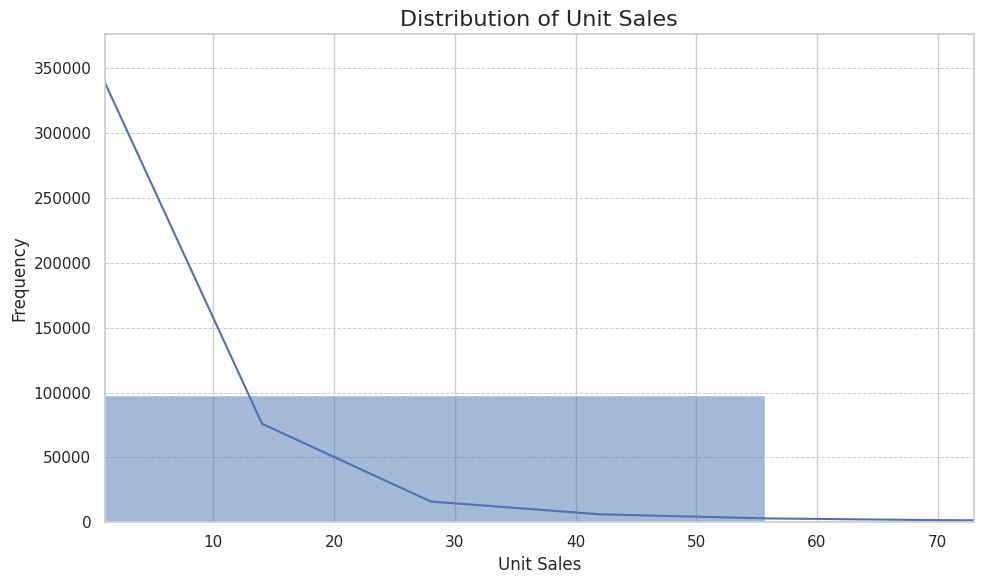

In [ ]:
# Inspect the unit_sales distribution
print(grocery_df['unit_sales'].describe())

# Set x-axis limits based on percentiles (e.g., 1st and 99th)
lower_limit = grocery_df['unit_sales'].quantile(0.01)
upper_limit = grocery_df['unit_sales'].quantile(0.99)

# Plot histogram with adjusted x-limits
plt.figure(figsize=(10, 6))
sns.histplot(data=grocery_df, x='unit_sales', kde=True, bins=50)
plt.title('Distribution of Unit Sales', fontsize=16)
plt.xlabel('Unit Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(lower_limit, upper_limit)  # Adjust x-axis limits
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


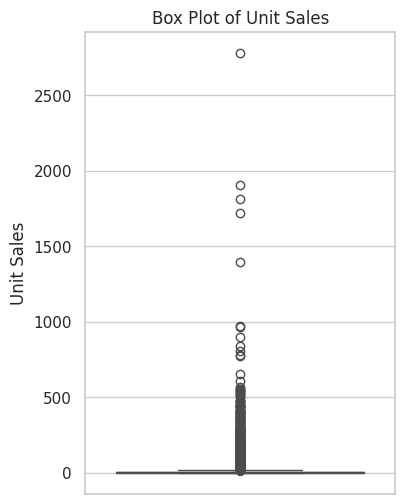

In [ ]:
plt.figure(figsize=(4, 6))
sns.boxplot(y='unit_sales', data=grocery_df)
plt.title('Box Plot of Unit Sales')
plt.ylabel('Unit Sales')
plt.show()

## 2. Time Series Plots

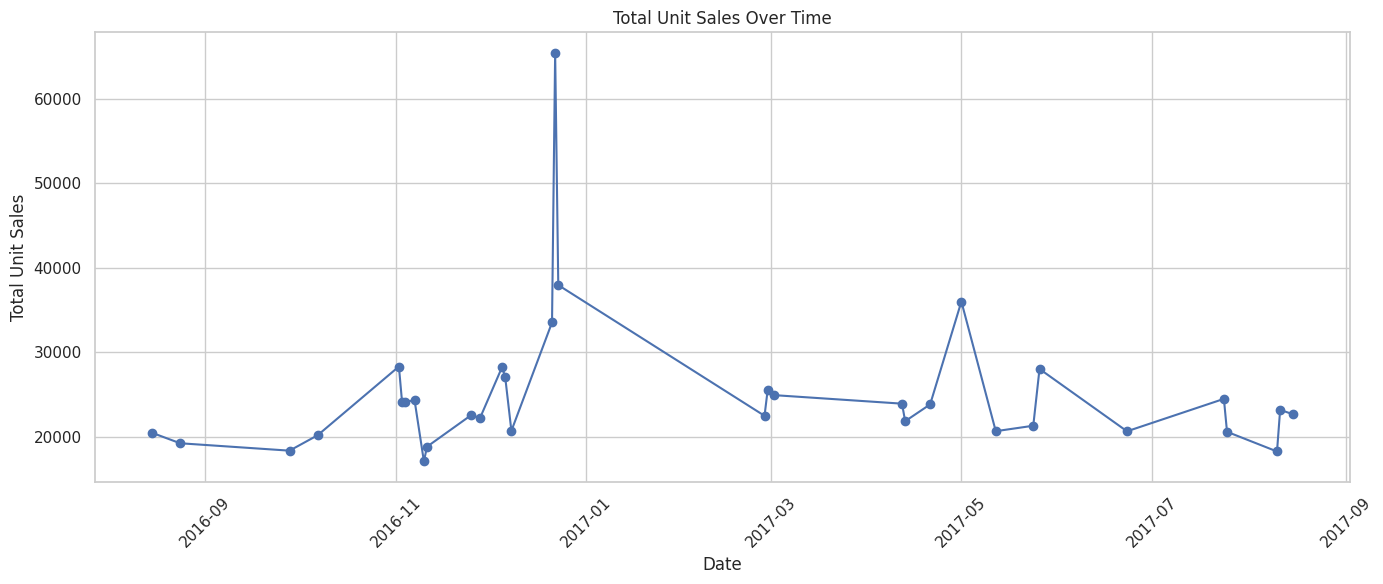

In [ ]:
# Aggregate sales by date
daily_sales = grocery_df.groupby('date', as_index=False)['unit_sales'].sum()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['unit_sales'], marker='o', linestyle='-')
plt.title('Total Unit Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Sales by Family

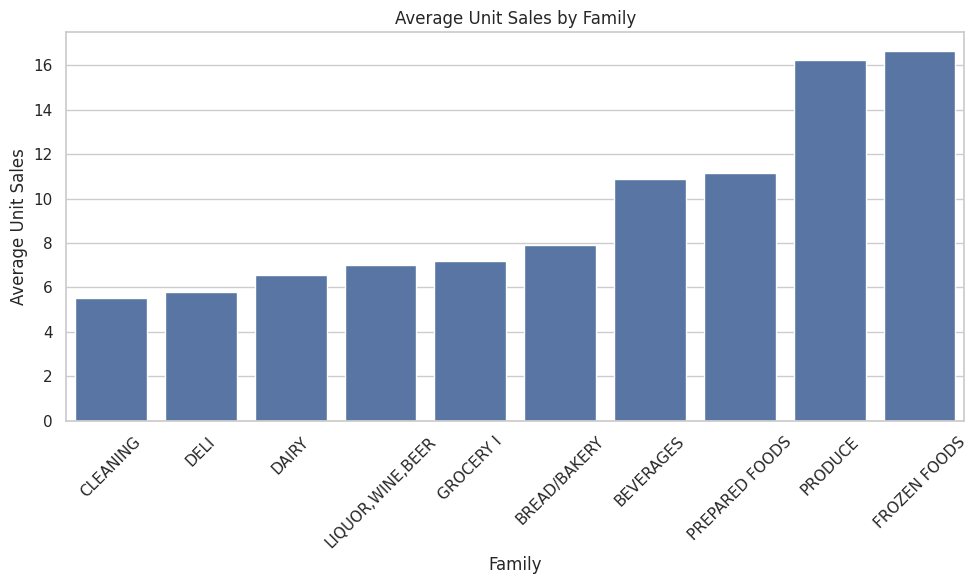

In [ ]:
family_sales = grocery_df.groupby('family', as_index=False)['unit_sales'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(data=family_sales, x='family', y='unit_sales', order=family_sales.sort_values('unit_sales')['family'])
plt.title('Average Unit Sales by Family')
plt.xlabel('Family')
plt.ylabel('Average Unit Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Sales by Store Type

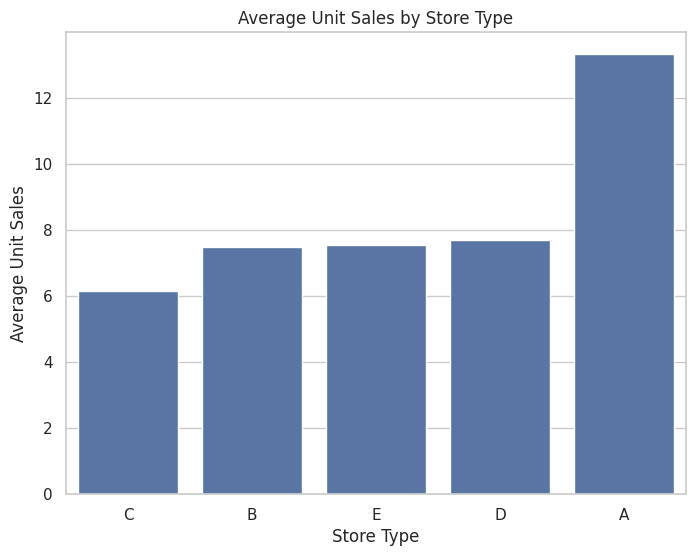

In [ ]:
store_type_sales = grocery_df.groupby('store_type', as_index=False)['unit_sales'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(data=store_type_sales, x='store_type', y='unit_sales',
            order=store_type_sales.sort_values('unit_sales')['store_type'])
plt.title('Average Unit Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Unit Sales')
plt.show()

## 5. Sales by Store Cluster

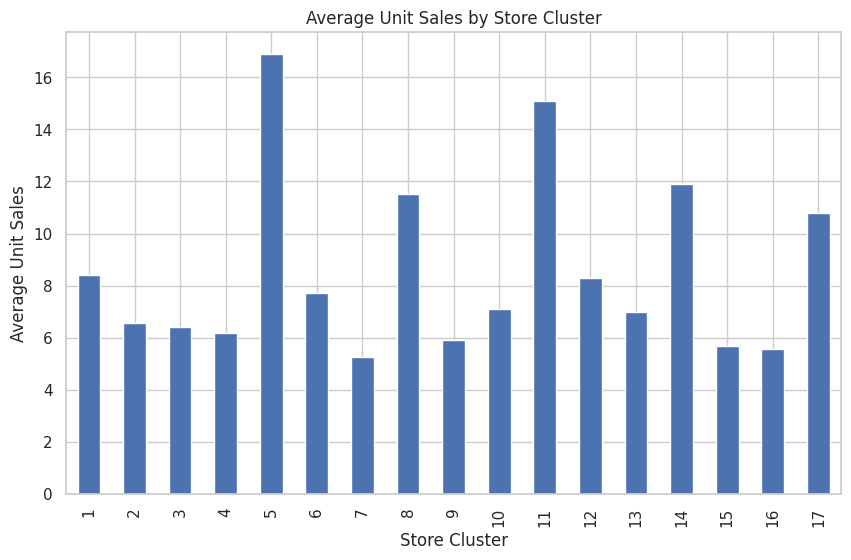

In [ ]:
cluster_sales = grocery_df.groupby('store_cluster')['unit_sales'].mean()
plt.figure(figsize=(10,6))
cluster_sales.plot(kind='bar')
plt.title('Average Unit Sales by Store Cluster')
plt.xlabel('Store Cluster')
plt.ylabel('Average Unit Sales')
plt.show()

## 6. Holidays Distribution

<ipython-input-71-473d9c435fac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='holiday_type', data=grocery_df, palette='pastel')
<ipython-input-71-473d9c435fac>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='holiday_scope', data=grocery_df, palette='Set2')
<ipython-input-71-473d9c435fac>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transferred', data=grocery_df, palette='coolwarm')


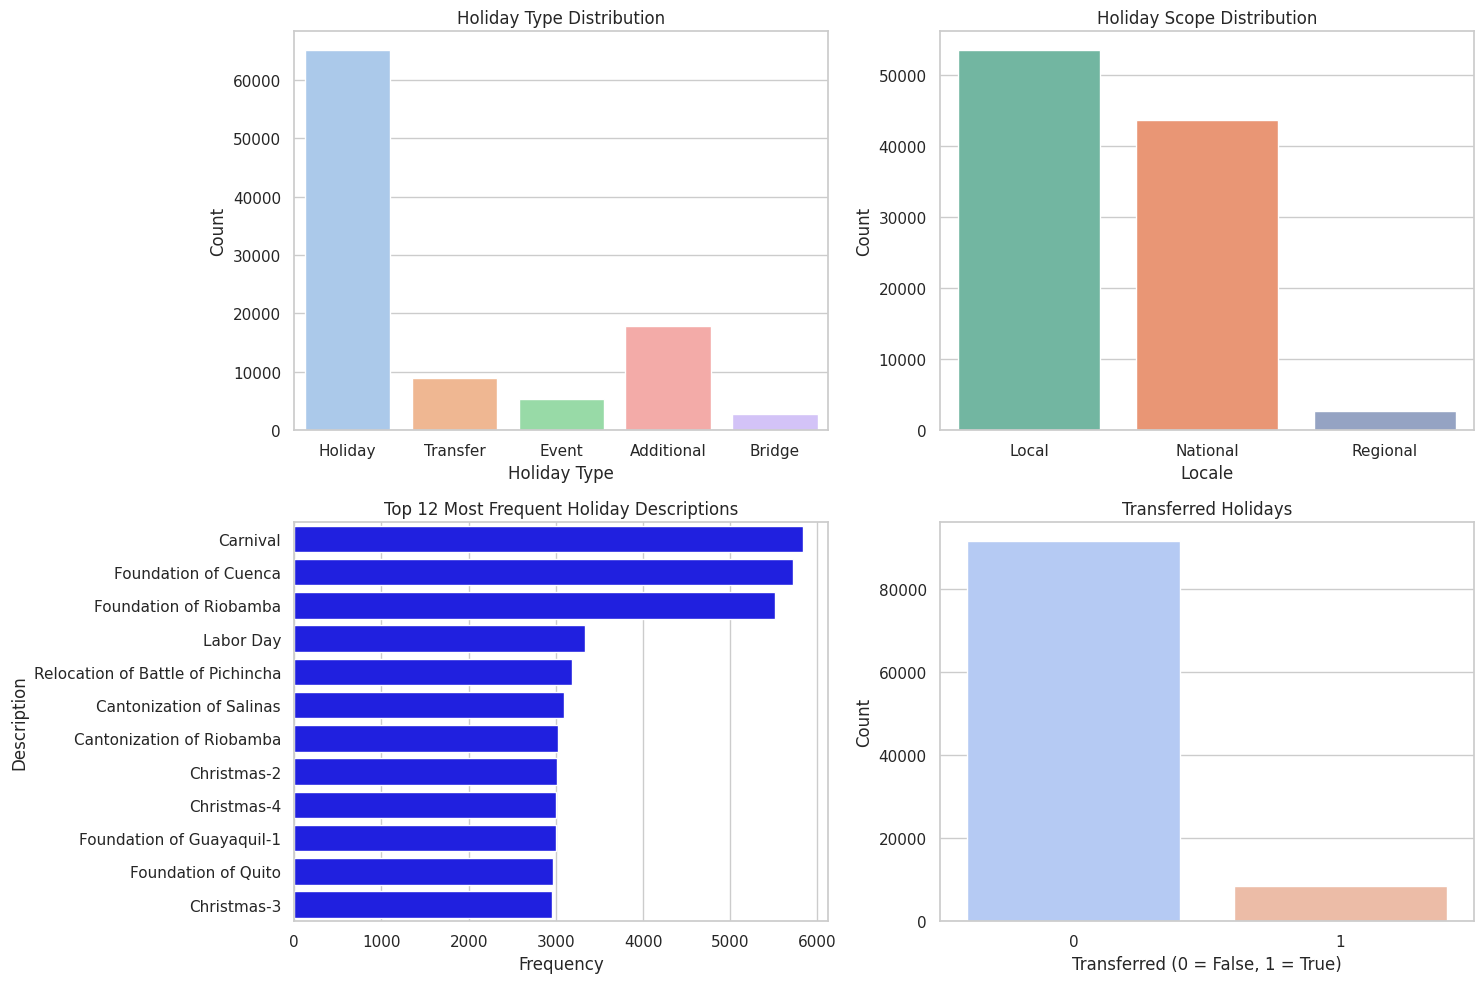

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure size
plt.figure(figsize=(15, 10))

# Plot 1: Bar plot for 'type'
plt.subplot(2, 2, 1)
sns.countplot(x='holiday_type', data=grocery_df, palette='pastel')
plt.title('Holiday Type Distribution')
plt.xlabel('Holiday Type')
plt.ylabel('Count')

# Plot 2: Bar plot for 'locale'
plt.subplot(2, 2, 2)
sns.countplot(x='holiday_scope', data=grocery_df, palette='Set2')
plt.title('Holiday Scope Distribution')
plt.xlabel('Locale')
plt.ylabel('Count')

# Plot 3: Top 12 most frequent descriptions
plt.subplot(2, 2, 3)
top_descriptions = grocery_df['holiday_description'].value_counts().head(12).reset_index()
top_descriptions.columns = ['description', 'frequency']
sns.barplot(x='frequency', y='description', data=top_descriptions, color='blue')
plt.title('Top 12 Most Frequent Holiday Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Description')

# Plot 4: Bar plot for 'transferred'
plt.subplot(2, 2, 4)
sns.countplot(x='transferred', data=grocery_df, palette='coolwarm')
plt.title('Transferred Holidays')
plt.xlabel('Transferred (0 = False, 1 = True)')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

## 7. Promotion Impact on Sales

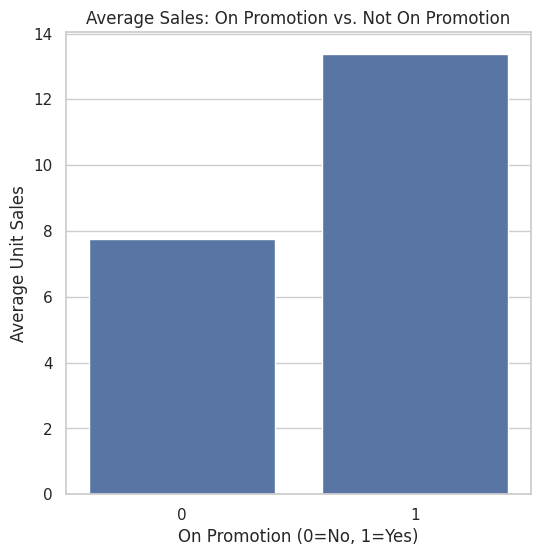

In [ ]:
promo_sales = grocery_df.groupby('onpromotion', as_index=False)['unit_sales'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x='onpromotion', y='unit_sales', data=promo_sales)
plt.title('Average Sales: On Promotion vs. Not On Promotion')
plt.xlabel('On Promotion (0=No, 1=Yes)')
plt.ylabel('Average Unit Sales')
plt.show()

## 8. Monthly Sales variation

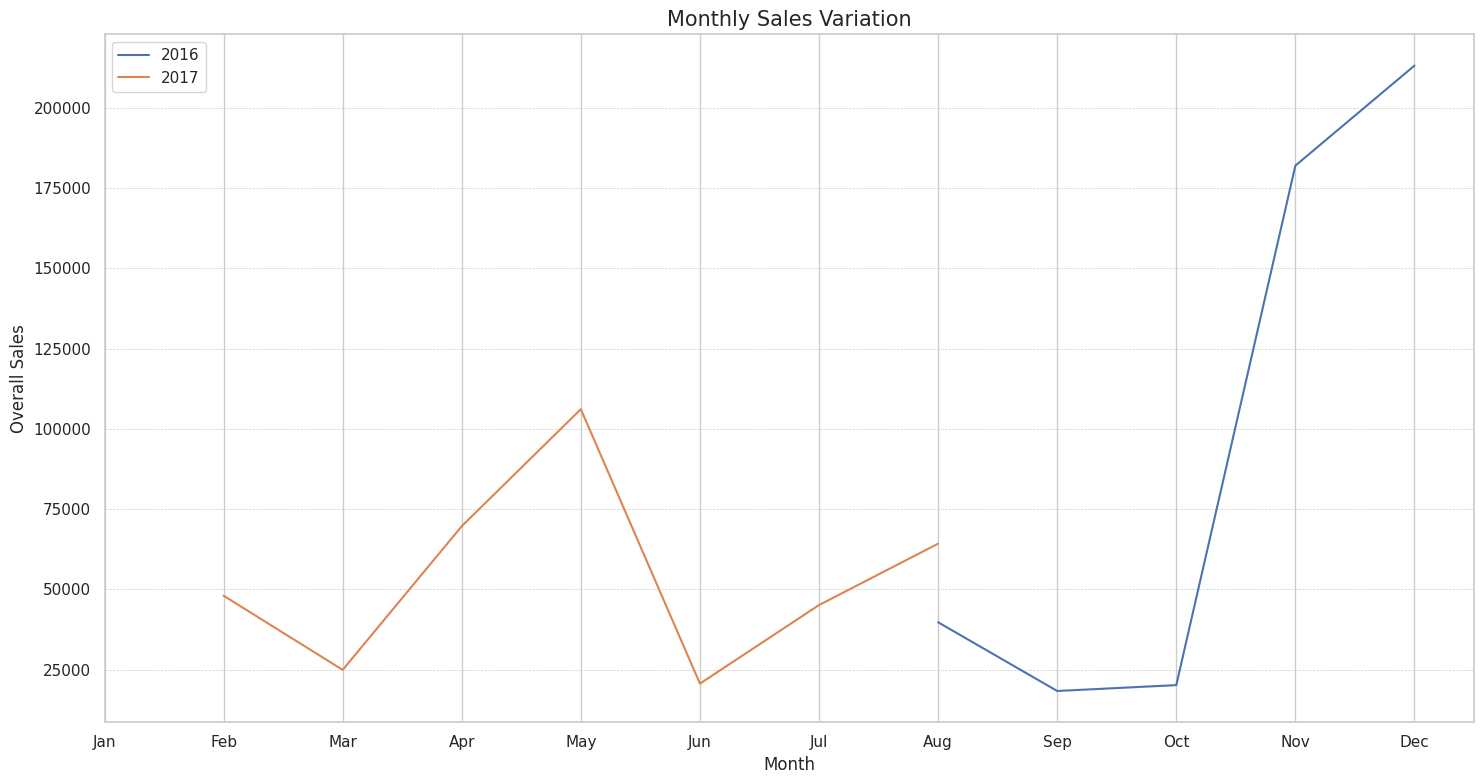

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'date' column is in datetime format
grocery_df['date'] = pd.to_datetime(grocery_df['date'])

# Extract year and month
grocery_df['Year'] = grocery_df['date'].dt.year
grocery_df['Month'] = grocery_df['date'].dt.month

# Group data by Year and Month, aggregating unit_sales
monthly_sales = grocery_df.groupby(['Year', 'Month'])['unit_sales'].sum().reset_index()

# Prepare data for plotting
years = sorted(monthly_sales['Year'].unique())
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid", color_codes=True)

for year in years:
    sales = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(sales['Month'], sales['unit_sales'], label=str(year))

# Customize plot
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Monthly Sales Variation', fontsize=15)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

## 9. Store Distribution

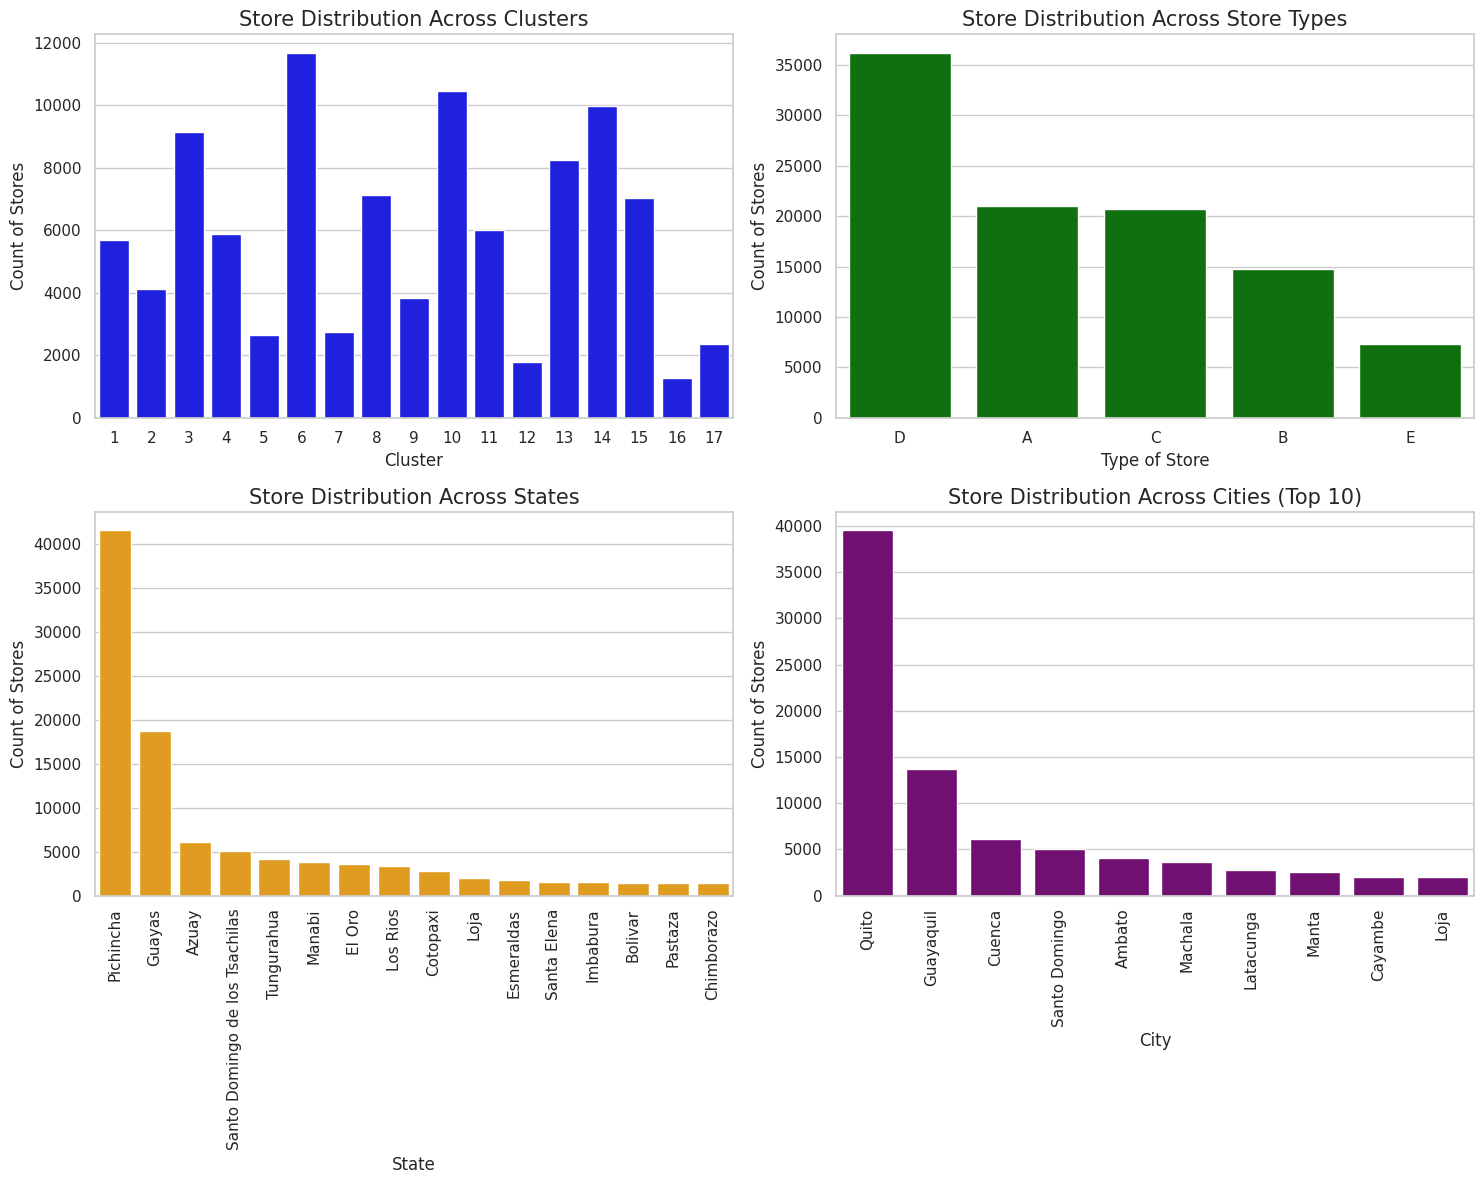

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure size and layout
plt.figure(figsize=(15, 12))

# Subplot 1: Store distribution across clusters
plt.subplot(221)
cluster_counts = grocery_df['store_cluster'].value_counts()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, color='blue')
plt.ylabel('Count of Stores', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Store Distribution Across Clusters', fontsize=15)

# Subplot 2: Store distribution across types
plt.subplot(222)
type_counts = grocery_df['store_type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, color='green')
plt.ylabel('Count of Stores', fontsize=12)
plt.xlabel('Type of Store', fontsize=12)
plt.title('Store Distribution Across Store Types', fontsize=15)

# Subplot 3: Store distribution across states
plt.subplot(223)
state_counts = grocery_df['store_state'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, color='orange')
plt.ylabel('Count of Stores', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Store Distribution Across States', fontsize=15)
plt.xticks(rotation='vertical')

# Subplot 4: Store distribution across cities
plt.subplot(224)
city_counts = grocery_df['store_city'].value_counts().head(10)  # Top 10 cities for better readability
sns.barplot(x=city_counts.index, y=city_counts.values, color='purple')
plt.ylabel('Count of Stores', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Store Distribution Across Cities (Top 10)', fontsize=15)
plt.xticks(rotation='vertical')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## 10. Correlation Matrix

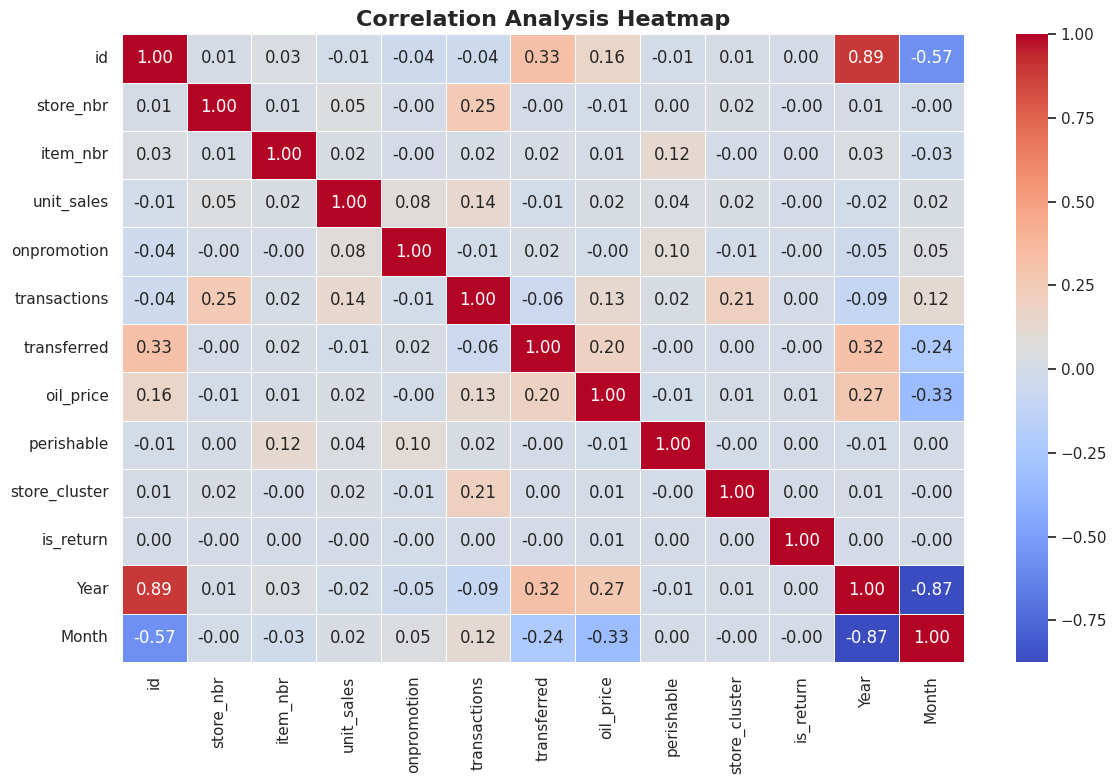

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_columns = grocery_df.select_dtypes(include=['int64', 'float64', 'int32']).columns
correlation_matrix = grocery_df[numeric_columns].corr()

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)

# Add title and adjust layout
plt.title('Correlation Analysis Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

Feature Engineering

In [ ]:
grocery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99995 entries, 0 to 99994
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   99995 non-null  int64         
 1   date                 99995 non-null  datetime64[ns]
 2   store_nbr            99995 non-null  int64         
 3   item_nbr             99995 non-null  int64         
 4   unit_sales           99995 non-null  float64       
 5   onpromotion          99995 non-null  int64         
 6   transactions         99995 non-null  float64       
 7   holiday_type         99995 non-null  object        
 8   holiday_scope        99995 non-null  object        
 9   location             99995 non-null  object        
 10  transferred          99995 non-null  int64         
 11  holiday_description  99995 non-null  object        
 12  oil_price            99995 non-null  float64       
 13  family               99995 non-

In [ ]:
grocery_df['is_return'].value_counts()

,count
is_return,
0,99987
1,8


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,transactions,holiday_type,holiday_scope,location,...,store_state,store_type,store_cluster,is_return,Year,Month,lag_1,lag_7,rolling_7d_mean,rolling_30d_mean
82992,100607226,2016-12-21,1,957098,-1.0,0,2555.0,Additional,National,Ecuador,...,Pichincha,D,13,1,2016,12,3.0,NaN,NaN,NaN
36743,125395916,2017-08-15,1,1960304,-1.0,0,1693.0,Holiday,Local,Riobamba,...,Pichincha,D,13,1,2017,8,NaN,NaN,NaN,NaN
79312,116840147,2017-05-26,5,1489897,-1.0,0,1223.0,Transfer,National,Ecuador,...,Santo Domingo de los Tsachilas,D,4,1,2017,5,NaN,NaN,NaN,NaN
34627,107708763,2017-02-28,30,1083518,-2.0,0,622.0,Holiday,National,Ecuador,...,Guayas,C,3,1,2017,2,NaN,NaN,NaN,NaN
9197,100884285,2016-12-23,33,902839,-1.0,0,1427.0,Additional,National,Ecuador,...,Los Rios,C,3,1,2016,12,NaN,NaN,NaN,NaN


In [ ]:
df

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,transactions,holiday_type,holiday_scope,location,...,store_state,store_type,store_cluster,is_return,Year,Month,lag_1,lag_7,rolling_7d_mean,rolling_30d_mean
82992,100607226,2016-12-21,1,957098,1.0,0,2555.0,Additional,National,Ecuador,...,Pichincha,D,13,1,2016,12,3.0,NaN,NaN,NaN
36743,125395916,2017-08-15,1,1960304,1.0,0,1693.0,Holiday,Local,Riobamba,...,Pichincha,D,13,1,2017,8,NaN,NaN,NaN,NaN
79312,116840147,2017-05-26,5,1489897,1.0,0,1223.0,Transfer,National,Ecuador,...,Santo Domingo de los Tsachilas,D,4,1,2017,5,NaN,NaN,NaN,NaN
34627,107708763,2017-02-28,30,1083518,2.0,0,622.0,Holiday,National,Ecuador,...,Guayas,C,3,1,2017,2,NaN,NaN,NaN,NaN
9197,100884285,2016-12-23,33,902839,1.0,0,1427.0,Additional,National,Ecuador,...,Los Rios,C,3,1,2016,12,NaN,NaN,NaN,NaN
89783,99334338,2016-12-08,47,1345337,1.0,0,3753.0,Holiday,Local,Loja,...,Pichincha,A,14,1,2016,12,NaN,NaN,NaN,NaN
18652,115438284,2017-05-12,48,890372,1.0,0,2763.0,Holiday,Local,Puyo,...,Pichincha,A,14,1,2017,5,NaN,NaN,NaN,NaN
34139,107966209,2017-03-02,49,1968073,1.0,0,2822.0,Holiday,Local,Manta,...,Pichincha,A,11,1,2017,3,NaN,NaN,NaN,NaN


In [ ]:
# grocery_df.loc[grocery_df['is_return']==1, 'unit_sales'] = -(grocery_df['unit_sales'])

Lagged and Rolling Features

In [ ]:
# Sort by store_nbr, item_nbr, and date to ensure correct temporal order
grocery_df = grocery_df.sort_values(by=['store_nbr', 'item_nbr', 'date'])

# Group by store and item to create lagged and rolling features
grocery_df['lag_1'] = grocery_df.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1)
grocery_df['lag_7'] = grocery_df.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(7)

# Rolling mean over the past 7 days (window=7)
grocery_df['rolling_7d_mean'] = grocery_df.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).rolling(window=7).mean()

# Rolling mean over the past 30 days (window=30)
grocery_df['rolling_30d_mean'] = grocery_df.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).rolling(window=30).mean()